## Develop a basic module/notebook that allows users to create interactive model plots and vary parameters using sliders

Let's use `ipywidgets`. Learning the basics from this tutorial: https://kapernikov.com/ipywidgets-with-matplotlib/

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

In [3]:
def three(x, y, z):
    return (x, y, z)

_ = widgets.interact(
    three, 
    x=(0, 10, 1), 
    y=True, 
    z=widgets.fixed('I am fixed')
)

interactive(children=(IntSlider(value=5, description='x', max=10), Checkbox(value=True, description='y'), Outp…

In [4]:
@widgets.interact(x=(0, 10, 1))
def foo(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Slider says: {x}')

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

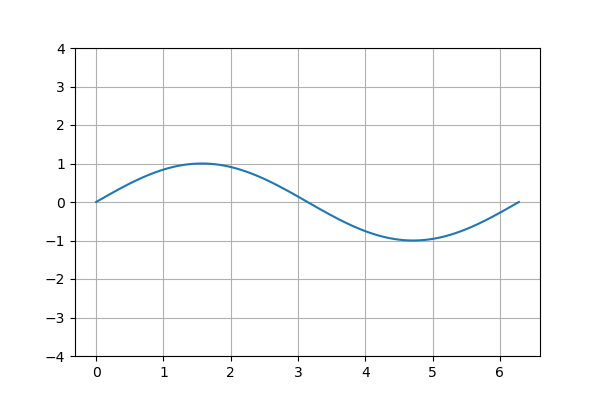

In [5]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')


In [6]:
int_slider = widgets.IntSlider(
    value=5, 
    min=0, max=10, step=1, 
    description='slider'
)
 
int_range_slider = widgets.IntRangeSlider(
    value=(20, 40), 
    min=0, max=100, step=2, 
    description='range slider'
)
 
dropdown = widgets.Dropdown(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='dropdown'
)
 
radiobuttons = widgets.RadioButtons(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='radio buttons'
)
 
combobox = widgets.Combobox(
    placeholder='start typing... (e.g. L or o)',
    options=['Amsterdam', 'Athens', 'Lisbon', 'London', 'Ljubljana'], 
    description='combo box'
)
 
checkbox = widgets.Checkbox(
    description='checkbox',
    value=True
)
 
 
# a VBox container to pack widgets vertically
widgets.VBox(
    [
        int_slider, 
        int_range_slider, 
        dropdown, 
        radiobuttons,
        checkbox,
        combobox,
    ]
)

In [7]:
sl1 = widgets.IntSlider(description='slider 1', min=0, max=10)
sl2 = widgets.IntSlider(description='slider 2', min=0, max=10)
 
link = widgets.link(
    (sl1, 'value'), 
    (sl2, 'min')
)
 
sl1.value = 5
widgets.VBox([sl1, sl2])

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

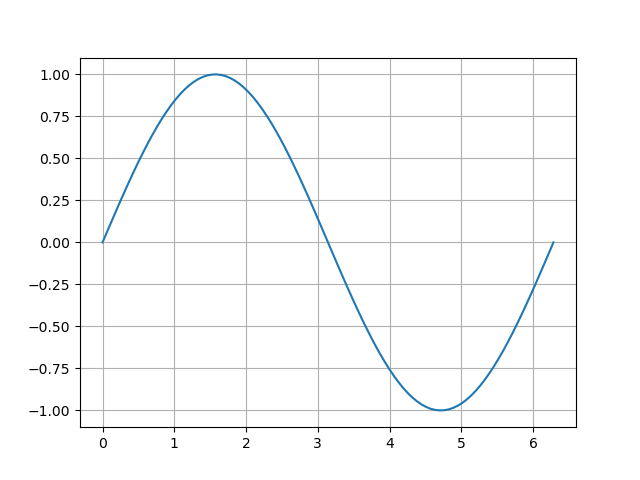

In [8]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

In [3]:
b1 = widgets.Button(description='button 1')
b2 = widgets.Button(description='button 2')
b3 = widgets.Button(description='button 3')

dropdown = widgets.Dropdown(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='dropdown'
)
 
radiobuttons = widgets.RadioButtons(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='radio buttons'
)

def make_boxes():
    vbox1 = widgets.VBox([widgets.Label('Left'), b1, b2])
    vbox2 = widgets.VBox([widgets.Label('Right'), dropdown, radiobuttons])
    return vbox1, vbox2
 
box_layout = widgets.Layout(
        border='solid 1px red',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
 
vbox1, vbox2 = make_boxes()
 
vbox1.layout = box_layout
vbox2.layout = box_layout
 
widgets.HBox([vbox1, vbox2])

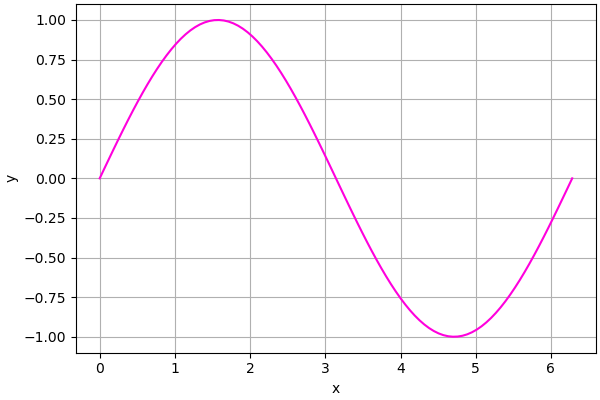

In [10]:
output = widgets.Output()
 
# create some x data
x = np.linspace(0, 2 * np.pi, 100)
 
# default line color
initial_color = '#FF00DD'
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(x, np.sin(x), initial_color)


# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
 
# callback functions
def update(change):
    """redraw line (update plot)"""
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
def line_color(change):
    """set line color"""
    line.set_color(change.new)
     
def update_xlabel(change):
    ax.set_xlabel(change.new)
     
def update_ylabel(change):
    ax.set_ylabel(change.new)
 
# connect callbacks and traits
int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')
 
text_xlabel.value = 'x'
text_ylabel.value = 'y'

controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel])
widgets.HBox([controls, output])

The widgets seem to be working well. Let's create a simple application where we vary a single parameter of a one component model

In [3]:
import frostie.hapke as hapke
import frostie.utils as utils

In [5]:
from importlib import reload
reload(hapke)

<module 'frostie.hapke' from '/Users/imishra/My Drive/Work/Research_core/Code/FROSTIE/frostie/hapke.py'>

In [7]:
regolith = hapke.regolith()

wav_water, n_water, k_water = utils.load_water_op_cons()

water = {'name':'h2o', 'n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2'}

regolith.add_components([water])

regolith.set_obs_geometry(i=45,e=45,g=90)

regolith.set_porosity(porosity=0.9)

regolith.set_backscattering(B=0)

regolith.set_s(s=0)

regolith.calculate_reflectance()



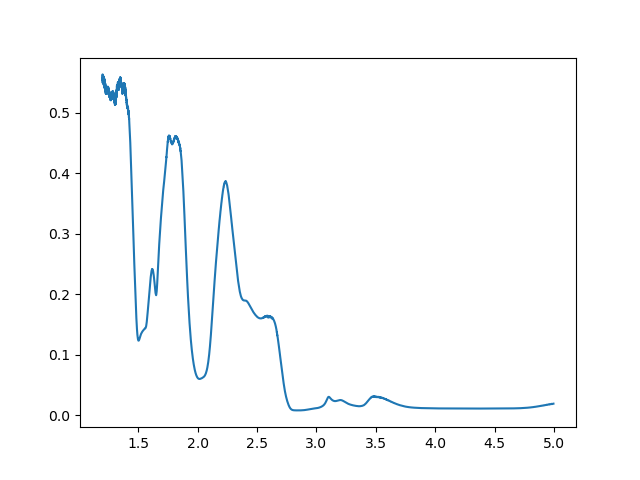

In [8]:
plt.figure()
plt.plot(regolith.wav_model, regolith.model)

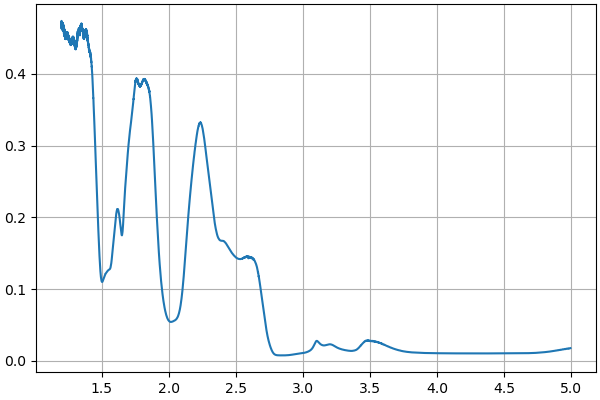

In [41]:
output = widgets.Output()
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(regolith.wav_model, regolith.model)


# create some control elements
int_slider = widgets.IntSlider(value=45, min=0, max=90, step=0.1, description='inc. angle')
 
# callback functions
def update_s(change):
    """redraw line (update plot)"""
    regolith.i = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()
 
# connect callbacks and traits
int_slider.observe(update_s, 'value')

controls = widgets.VBox([int_slider])
widgets.VBox([controls, output])

Works well!!!

Now let's try a two component model with sliders for grain sie and abundance values

In [28]:
from importlib import reload
reload(hapke)

<module 'frostie.hapke' from '/Users/imishra/My Drive/Work/Research_core/Code/FROSTIE/frostie/hapke.py'>

In [31]:
f = 0.5    # equal abundance (by number) fraction

regolith = hapke.regolith()

wav_water, n_water, k_water = utils.load_water_op_cons()
wav_co2, n_co2, k_co2 = utils.load_co2_op_cons()

water = {'name':'water','n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2', 'f':f}
co2 = {'name':'carbon dioxide', 'n':n_co2, 'k':k_co2, 'wav':wav_co2, 'D':100, 'p_type':'HG2', 'f':f}

regolith.add_components([water, co2], matched_axes=False)

regolith.set_obs_geometry(i=45,e=45,g=90)

regolith.set_porosity(porosity=0.9)

regolith.set_backscattering(B=0)

regolith.set_s(s=0)

regolith.set_mixing_mode('intimate')

regolith.calculate_reflectance()

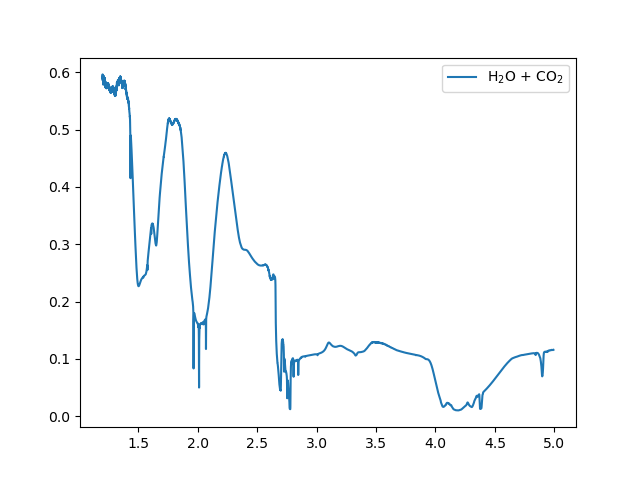

In [11]:
plt.figure()
plt.plot(regolith.wav_model, regolith.model, label='H$_2$O + CO$_2$')
plt.legend()

In [33]:
# Create simulated data with Gaussian noise

snr = 50
noise = regolith.model/snr
np.random.seed(42)
data = regolith.model + noise*np.random.randn(regolith.model.size)
wav_data = np.copy(regolith.wav_model)

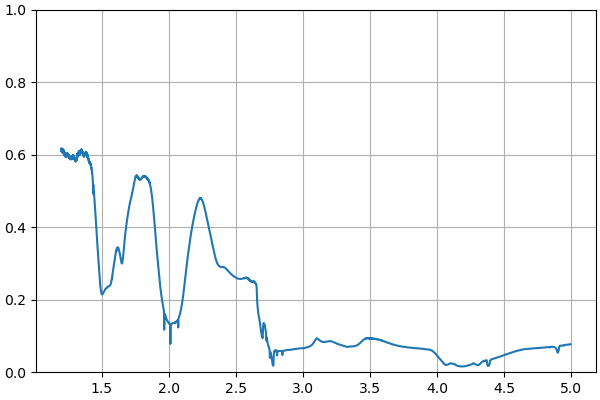

In [34]:
output = widgets.Output()
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(regolith.wav_model, regolith.model)
ax.set_ylim((0,1))

# create a checkbox that controls overplotting of data

#data_checkbox = widgets.Checkbox(description='Display Data', value=False)

# create some control elements

# fraction of water
f_water_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='H₂O fraction', style=dict(description_width='initial'))

# grain size of water
D_water_slider = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='H₂O grain size', style=dict(description_width='initial'))

# grain size of carbon dioxide
D_co2_slider = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='CO₂ grain size', style=dict(description_width='initial'))

# porosity
porosity_slider = widgets.FloatSlider(value=0.5, min=0.48, max=0.99, step=0.01, description='porosity', style=dict(description_width='initial'))

# incidence angle
i_slider = widgets.FloatSlider(value=45, min=0, max=90, step=0.5, description='inc. angle', style=dict(description_width='initial'))

# emission angle
e_slider = widgets.FloatSlider(value=45, min=0, max=90, step=0.5, description='emi. angle', style=dict(description_width='initial'))

# phase angle
g_slider = widgets.FloatSlider(value=90, min=0, max=180, step=0.5, description='phase angle', style=dict(description_width='initial'))



# callback functions
'''
def show_data(change):
    if change.new:
        ax.errorbar(wav_data, data, yerr=noise,color='#e41a1c',ls='none', marker='o', alpha=0.5, 
                    markersize=3, capsize=2, zorder=2, label='simulated data')
    else:
        ax.clear()
        line.set_ydata(regolith.model)
        fig.canvas.draw()

'''
def update_f_water(change):
    """redraw line (update plot)"""
    regolith.components[0]['f'] = change.new
    regolith.components[1]['f'] = 1 - change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_D_water(change):
    """redraw line (update plot)"""
    regolith.components[0]['D'] = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_D_co2(change):
    """redraw line (update plot)"""
    regolith.components[1]['D'] = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_porosity(change):
    """redraw line (update plot)"""
    regolith.porosity = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_i(change):
    """redraw line (update plot)"""
    regolith.i = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_e(change):
    """redraw line (update plot)"""
    regolith.e = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_g(change):
    """redraw line (update plot)"""
    regolith.g = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()
 
# connect callbacks and traits
#data_checkbox.observe(show_data, 'value')
f_water_slider.observe(update_f_water, 'value')
D_water_slider.observe(update_D_water, 'value')
D_co2_slider.observe(update_D_co2, 'value')
porosity_slider.observe(update_porosity, 'value')
i_slider.observe(update_i, 'value')
e_slider.observe(update_e, 'value')
g_slider.observe(update_g, 'value')

def make_boxes():
    vbox1 = widgets.VBox([f_water_slider, D_water_slider, D_co2_slider,porosity_slider])
    vbox2 = widgets.VBox([i_slider, e_slider, g_slider])
    return vbox1, vbox2
 
vbox1, vbox2 = make_boxes()

controls = widgets.HBox([vbox1, vbox2])
widgets.VBox([controls, output])